In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./data/clean/df_clean.csv')

In [4]:
df.columns

Index(['LAMBX', 'LAMBY', 'DATE', 'PRENEI_Q', 'PRELIQ_Q', 'T_Q', 'FF_Q', 'Q_Q',
       'DLI_Q', 'SSI_Q', 'HU_Q', 'EVAP_Q', 'ETP_Q', 'PE_Q', 'SWI_Q',
       'DRAINC_Q', 'RUNC_Q', 'RESR_NEIGE_Q', 'RESR_NEIGE6_Q', 'HTEURNEIGE_Q',
       'HTEURNEIGE6_Q', 'HTEURNEIGEX_Q', 'SNOW_FRAC_Q', 'ECOULEMENT_Q',
       'WG_RACINE_Q', 'WGI_RACINE_Q', 'TINF_H_Q', 'TSUP_H_Q', 'MONTH'],
      dtype='object')

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df = df.reset_index(drop=True).sort_values(by='DATE')

In [7]:
df_snowlvl = df[['DATE', 'PRENEI_Q', 'PRELIQ_Q', 'T_Q', 'FF_Q', 'Q_Q',
       'DLI_Q', 'SSI_Q', 'HU_Q', 'EVAP_Q', 'ETP_Q', 'PE_Q', 'SWI_Q',
       'DRAINC_Q', 'RUNC_Q', 'RESR_NEIGE_Q', 'RESR_NEIGE6_Q', 'HTEURNEIGE_Q',
       'HTEURNEIGE6_Q', 'HTEURNEIGEX_Q', 'SNOW_FRAC_Q', 'ECOULEMENT_Q',
       'WG_RACINE_Q', 'WGI_RACINE_Q', 'TINF_H_Q', 'TSUP_H_Q']]

In [267]:
def transform_to_supervised(df, datetime_col, feature_cols, target_col, n_past=24, n_future=24):

    df = df.copy()
    df.sort_values(by=datetime_col, inplace=True)
    df.reset_index(drop=True, inplace=True)

    supervised = pd.DataFrame()

    for col in feature_cols:
        for i in range(n_past, 0, -1):
            supervised[f'{col}(t-{i})'] = df[col].shift(i)

    for i in range(0, n_future):
        supervised[f'{target_col}(t+{i})'] = df[target_col].shift(-i)

    supervised.dropna(inplace=True)

    return supervised


In [269]:
df_supervised = transform_to_supervised(df_snowlvl, 'DATE', ['HTEURNEIGE_Q'], 'HTEURNEIGE_Q', n_past=24, n_future=24)

In [271]:
X = df_supervised.iloc[:,:-24].copy()
y = df_supervised.iloc[:,-24:].copy()

In [272]:
X

,HTEURNEIGE_Q(t-24),HTEURNEIGE_Q(t-23),HTEURNEIGE_Q(t-22),HTEURNEIGE_Q(t-21),HTEURNEIGE_Q(t-20),HTEURNEIGE_Q(t-19),HTEURNEIGE_Q(t-18),HTEURNEIGE_Q(t-17),HTEURNEIGE_Q(t-16),HTEURNEIGE_Q(t-15),...,HTEURNEIGE_Q(t-10),HTEURNEIGE_Q(t-9),HTEURNEIGE_Q(t-8),HTEURNEIGE_Q(t-7),HTEURNEIGE_Q(t-6),HTEURNEIGE_Q(t-5),HTEURNEIGE_Q(t-4),HTEURNEIGE_Q(t-3),HTEURNEIGE_Q(t-2),HTEURNEIGE_Q(t-1)
24,0.028,0.040,0.060,0.141,0.130,0.123,0.135,0.223,0.234,0.247,...,0.238,0.225,0.196,0.181,0.177,0.191,0.193,0.189,0.188,0.187
25,0.040,0.060,0.141,0.130,0.123,0.135,0.223,0.234,0.247,0.238,...,0.225,0.196,0.181,0.177,0.191,0.193,0.189,0.188,0.187,0.190
26,0.060,0.141,0.130,0.123,0.135,0.223,0.234,0.247,0.238,0.237,...,0.196,0.181,0.177,0.191,0.193,0.189,0.188,0.187,0.190,0.189
27,0.141,0.130,0.123,0.135,0.223,0.234,0.247,0.238,0.237,0.263,...,0.181,0.177,0.191,0.193,0.189,0.188,0.187,0.190,0.189,0.192
28,0.130,0.123,0.135,0.223,0.234,0.247,0.238,0.237,0.263,0.255,...,0.177,0.191,0.193,0.189,0.188,0.187,0.190,0.189,0.192,0.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.008,0.001,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5603,0.000,0.000,0.000,0.000,0.000,0.005,0.008,0.001,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5604,0.000,0.000,0.000,0.000,0.005,0.008,0.001,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5605,0.000,0.000,0.000,0.005,0.008,0.001,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [273]:
y

,HTEURNEIGE_Q(t+0),HTEURNEIGE_Q(t+1),HTEURNEIGE_Q(t+2),HTEURNEIGE_Q(t+3),HTEURNEIGE_Q(t+4),HTEURNEIGE_Q(t+5),HTEURNEIGE_Q(t+6),HTEURNEIGE_Q(t+7),HTEURNEIGE_Q(t+8),HTEURNEIGE_Q(t+9),...,HTEURNEIGE_Q(t+14),HTEURNEIGE_Q(t+15),HTEURNEIGE_Q(t+16),HTEURNEIGE_Q(t+17),HTEURNEIGE_Q(t+18),HTEURNEIGE_Q(t+19),HTEURNEIGE_Q(t+20),HTEURNEIGE_Q(t+21),HTEURNEIGE_Q(t+22),HTEURNEIGE_Q(t+23)
24,0.190,0.189,0.192,0.194,0.215,0.277,0.270,0.266,0.272,0.260,...,0.296,0.311,0.351,0.356,0.357,0.353,0.347,0.339,0.334,0.315
25,0.189,0.192,0.194,0.215,0.277,0.270,0.266,0.272,0.260,0.248,...,0.311,0.351,0.356,0.357,0.353,0.347,0.339,0.334,0.315,0.278
26,0.192,0.194,0.215,0.277,0.270,0.266,0.272,0.260,0.248,0.286,...,0.351,0.356,0.357,0.353,0.347,0.339,0.334,0.315,0.278,0.292
27,0.194,0.215,0.277,0.270,0.266,0.272,0.260,0.248,0.286,0.326,...,0.356,0.357,0.353,0.347,0.339,0.334,0.315,0.278,0.292,0.289
28,0.215,0.277,0.270,0.266,0.272,0.260,0.248,0.286,0.326,0.305,...,0.357,0.353,0.347,0.339,0.334,0.315,0.278,0.292,0.289,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5603,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5604,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5605,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [274]:
X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[:int(len(X)*0.8)], y[int(len(X)*0.8):]

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# y_train_scaled = scaler_y.fit_transform(y_train)
# y_test_scaled = scaler_y.transform(y_test)

y_train_scaled = y_train.copy()
y_test_scaled = y_test.copy()

In [15]:
len(['PRENEI_Q', 'PRELIQ_Q', 'T_Q', 'FF_Q', 'Q_Q',
       'DLI_Q', 'SSI_Q', 'HU_Q', 'EVAP_Q', 'ETP_Q', 'PE_Q', 'SWI_Q',
       'DRAINC_Q', 'RUNC_Q', 'RESR_NEIGE_Q', 'RESR_NEIGE6_Q', 'HTEURNEIGE_Q',
       'HTEURNEIGE6_Q', 'HTEURNEIGEX_Q', 'SNOW_FRAC_Q', 'ECOULEMENT_Q',
       'WG_RACINE_Q', 'WGI_RACINE_Q', 'TINF_H_Q', 'TSUP_H_Q'])

25

In [114]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

In [128]:
model_rf.fit(X_train_scaled, y_train_scaled)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [129]:
yhat = model_rf.predict(X_test_scaled)

In [130]:
yhat.shape

(661, 7)

In [19]:
import matplotlib.pyplot as plt

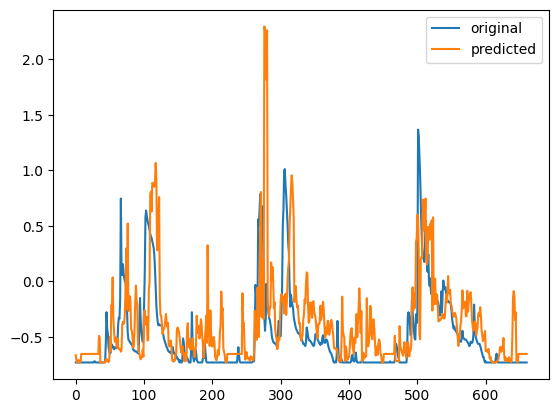

In [132]:
yhat = model_rf.predict(X_test_scaled)
plt.plot(y_test_scaled[:,6], label='original')
plt.plot(yhat[:,6], label='predicted')
plt.legend();

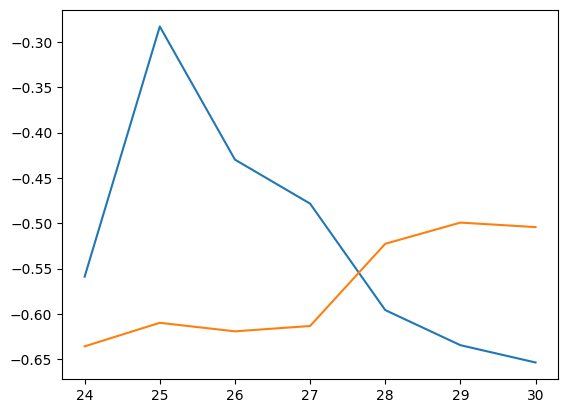

In [136]:
# plt.plot(range(24), X_test_scaled[25])
plt.plot(range(24,31), y_test_scaled[50])
plt.plot(range(24,31), yhat[50]);

In [122]:
from xgboost import XGBRegressor

In [245]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train_scaled, y_train_scaled)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


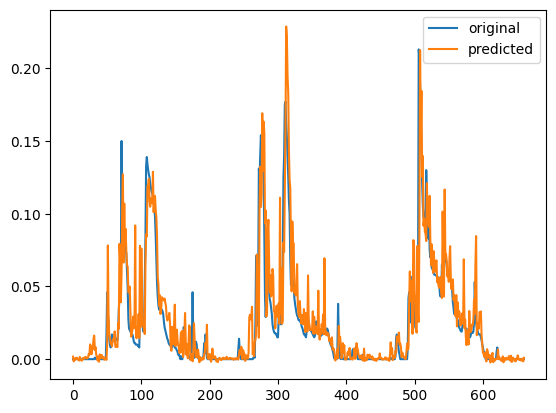

In [251]:
yhat = model_xgb.predict(X_test_scaled)
plt.plot(y_test_scaled.reset_index(drop=True).iloc[:,1], label='original')
plt.plot(yhat[:,1], label='predicted')
plt.legend();

In [16]:
df_snowlvl = df_snowlvl[['DATE', 'HTEURNEIGE_Q']]

In [17]:
df_snowlvl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3335 entries, 0 to 3334
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          3335 non-null   datetime64[ns]
 1   HTEURNEIGE_Q  3335 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.2 KB


In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

C:\Users\dmitrii.druzhbin\AppData\Local\Temp\ipykernel_18032\3083688591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_snowlvl['DATE'] = pd.to_datetime(df_snowlvl['DATE'])


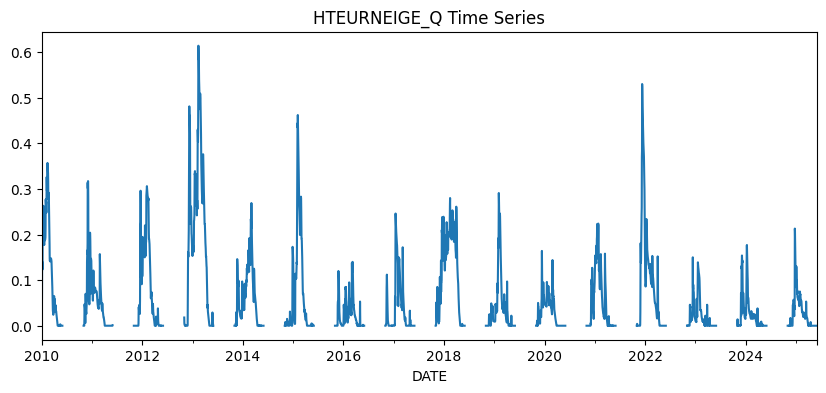

In [11]:

import matplotlib.pyplot as plt
# Set DATE as index
df_snowlvl['DATE'] = pd.to_datetime(df_snowlvl['DATE'])
df_snowlvl.set_index('DATE', inplace=True)

# Optional: resample to daily (if not already)
df_snowlvl = df_snowlvl.asfreq('D')

# Plot
df_snowlvl['HTEURNEIGE_Q'].plot(title='HTEURNEIGE_Q Time Series', figsize=(10, 4))
plt.show()


In [23]:
result = adfuller(df_snowlvl['HTEURNEIGE_Q'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -6.6826013599277365
p-value: 4.304475179141353e-09


In [ ]:
model = SARIMAX(df_snowlvl['HTEURNEIGE_Q'],
                order=(1,1,1),
                seasonal_order=(1,1,1,365),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
results.summary()

In [18]:
df_diff = df_supervised.copy()

In [19]:
df_diff

,HTEURNEIGE_Q(t-24),HTEURNEIGE_Q(t-23),HTEURNEIGE_Q(t-22),HTEURNEIGE_Q(t-21),HTEURNEIGE_Q(t-20),HTEURNEIGE_Q(t-19),HTEURNEIGE_Q(t-18),HTEURNEIGE_Q(t-17),HTEURNEIGE_Q(t-16),HTEURNEIGE_Q(t-15),...,HTEURNEIGE_Q(t-3),HTEURNEIGE_Q(t-2),HTEURNEIGE_Q(t-1),HTEURNEIGE_Q(t+0),HTEURNEIGE_Q(t+1),HTEURNEIGE_Q(t+2),HTEURNEIGE_Q(t+3),HTEURNEIGE_Q(t+4),HTEURNEIGE_Q(t+5),HTEURNEIGE_Q(t+6)
24,0.028,0.040,0.060,0.141,0.130,0.123,0.135,0.223,0.234,0.247,...,0.189,0.188,0.187,0.190,0.189,0.192,0.194,0.215,0.277,0.270
25,0.040,0.060,0.141,0.130,0.123,0.135,0.223,0.234,0.247,0.238,...,0.188,0.187,0.190,0.189,0.192,0.194,0.215,0.277,0.270,0.266
26,0.060,0.141,0.130,0.123,0.135,0.223,0.234,0.247,0.238,0.237,...,0.187,0.190,0.189,0.192,0.194,0.215,0.277,0.270,0.266,0.272
27,0.141,0.130,0.123,0.135,0.223,0.234,0.247,0.238,0.237,0.263,...,0.190,0.189,0.192,0.194,0.215,0.277,0.270,0.266,0.272,0.260
28,0.130,0.123,0.135,0.223,0.234,0.247,0.238,0.237,0.263,0.255,...,0.189,0.192,0.194,0.215,0.277,0.270,0.266,0.272,0.260,0.248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5620,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5621,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5622,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [20]:
def compute_diff(df: pd.DataFrame) -> pd.DataFrame:
    
    return df.diff().dropna().reset_index(drop=True)

In [21]:
df_diff = compute_diff(df_diff)

In [222]:
X = df_diff.iloc[:,:-7].copy()
y = df_diff.iloc[:,-7:].copy()

In [223]:
X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[:int(len(X)*0.8)], y[int(len(X)*0.8):]

In [224]:
from sklearn.preprocessing import StandardScaler

In [207]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# y_train_scaled = scaler_y.fit_transform(pd.DataFrame(y_train))
# y_test_scaled = scaler_y.transform(pd.DataFrame(y_test))

y_train_scaled = y_train.copy()
y_test_scaled = y_test.copy()

In [208]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=10)

In [209]:
model_rf.fit(X_train_scaled, y_train_scaled)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [210]:
yhat = model_rf.predict(X_test_scaled)

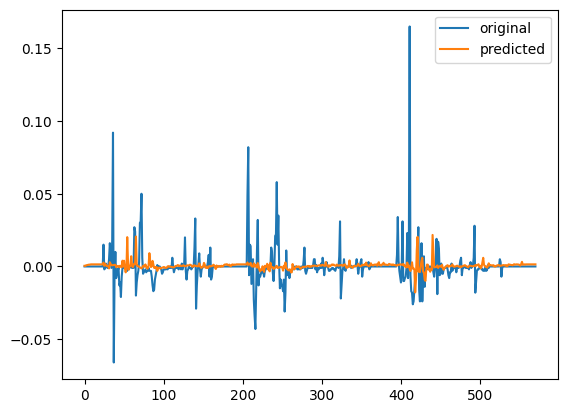

In [211]:
plt.plot(y_test_scaled.reset_index(drop=True)[:], label='original')
plt.plot(yhat[:], label='predicted')
plt.legend();

In [212]:
idx = int(len(X)*0.8)

In [213]:
last_value = df_supervised.iloc[idx + 1:, -7].values.reshape(-1,1)

In [214]:
last_value.shape

(571, 1)

In [215]:
yhat.reshape(-1,1).shape

(571, 1)

In [216]:
yhat_reconstracted = last_value + yhat.reshape(-1,1)

In [217]:
y_test_reconstracted = last_value + y_test_scaled.values.reshape(-1,1)

In [218]:
last_value.shape, yhat.shape

((571, 1), (571,))

In [219]:
yhat_reconstracted.shape

(571, 1)

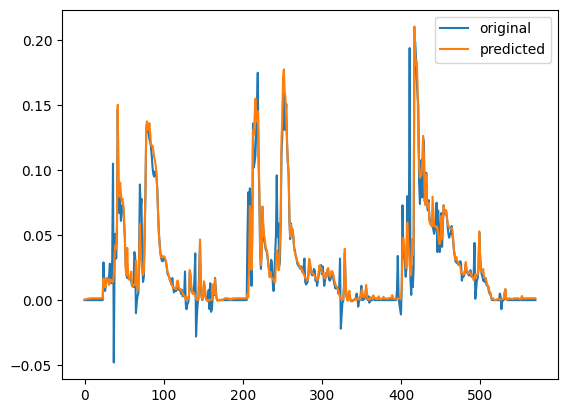

In [220]:
plt.plot(y_test_reconstracted[:], label='original')
plt.plot(yhat_reconstracted[:], label='predicted')
plt.legend();

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math

def train_forecast_per_step(X_train, X_test, y_train, y_test, df_supervised, split_idx):
    results = {}
    scaler_x = StandardScaler()

    # Scale inputs
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)

    for step in range(y_train.shape[1]):
        # Fit a separate scaler for each output step
        scaler_yi = StandardScaler()
        y_train_i_scaled = scaler_yi.fit_transform(y_train.iloc[:, step].values.reshape(-1, 1))
        y_test_i_scaled = scaler_yi.transform(y_test.iloc[:, step].values.reshape(-1, 1))

        # Train model for this step
        model = RandomForestRegressor(n_estimators=100, max_depth=10)
        model.fit(X_train_scaled, y_train_i_scaled.ravel())

        # Predict
        yhat = model.predict(X_test_scaled)
        ytrue = y_test_i_scaled.ravel()

        # Evaluate
        rmse = math.sqrt(mean_squared_error(ytrue, yhat))
        print(f"Step {step} - RMSE (diff): {rmse:.4f}")

        # Plot predicted vs true (diff values)
        plt.figure(figsize=(15, 3))
        plt.plot(ytrue, label='True Δ')
        plt.plot(yhat, label='Predicted Δ', alpha=0.7)
        plt.title(f"Step {step} - Diff values")
        plt.legend()
        plt.show()

        # Reconstruct absolute values
        last_values = df_supervised.iloc[split_idx + 1:, -25].values.reshape(-1, 1)  # value(t-1)
        yhat_inv = scaler_yi.inverse_transform(yhat.reshape(-1, 1))
        ytrue_inv = scaler_yi.inverse_transform(ytrue.reshape(-1, 1))
        yhat_abs = last_values + yhat_inv
        ytrue_abs = last_values + ytrue_inv

        # Plot reconstructed absolute values
        plt.figure(figsize=(15, 3))
        plt.plot(ytrue_abs, label='True')
        plt.plot(yhat_abs, label='Predicted', alpha=0.7)
        plt.title(f"Step {step} - Reconstructed absolute values")
        plt.legend()
        plt.show()

        # Save results
        results[f"step_{step}"] = {
            "model": model,
            "scaler_y": scaler_yi,
            "rmse": rmse,
            "yhat_diff": yhat,
            "ytrue_diff": ytrue,
            "yhat_abs": yhat_abs,
            "ytrue_abs": ytrue_abs,
        }

    return results

Step 0 - RMSE (diff): 0.1312


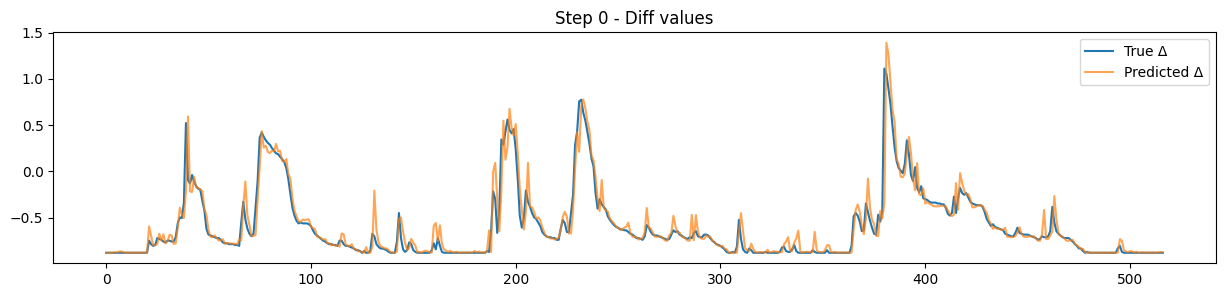

ValueError: operands could not be broadcast together with shapes (299,1) (517,1) 

In [277]:
results = train_forecast_per_step(X_train,X_test,y_train,y_test, df_supervised, split_idx=idx)

In [261]:
prediction = []
for step in results.keys():
    prediction.append(results[step]['yhat_abs'])

In [262]:
real = []
for step in results.keys():
    real.append(results[step]['ytrue_abs'])

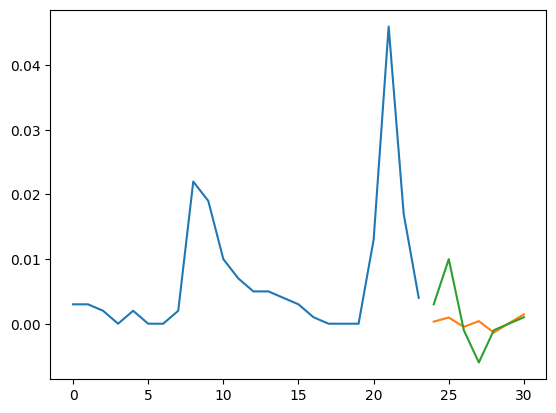

In [266]:
plt.plot(range(24), df_supervised.iloc[idx + 150,:-7])
plt.plot(range(24,31), [pred[150] for pred in prediction])
plt.plot(range(24,31), [y_real[150] for y_real in real]);

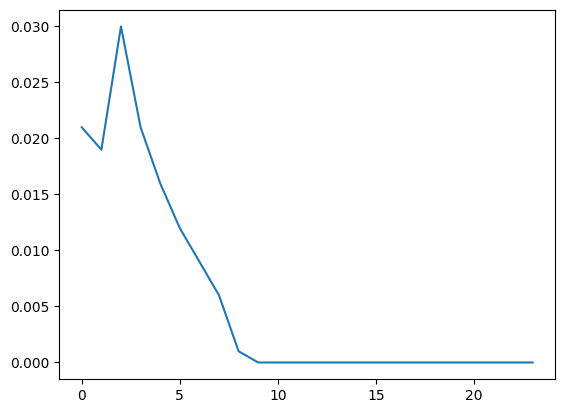

In [250]:
plt.plot(range(24), df_supervised.iloc[idx + 0, :-7])

In [ ]:
df_supervised[]